In [62]:
import sys, os
sys.path.append('/user_data/mmhender/imStat/code/')
from utils import default_paths, prf_utils, nsd_utils
from model_fitting import initialize_fitting
import h5py
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats


In [63]:
from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]

dfname = '/user_data/mmhender/features/sketch_tokens/cluster_ims_curv_rect_values.csv'
df = pd.read_csv(dfname)
curv_values = np.array(df['best_bend'])
orient_values =np.array(df['best_orient'])*180/np.pi
df

,files,best_scale,best_bend,best_orient
0,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0000,1.658063
1,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0000,3.141593
2,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0000,1.308997
3,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0000,4.625123
4,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0000,0.349066
...,...,...,...,...
145,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0000,3.141593
146,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0025,4.712389
147,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0025,1.745329
148,/user_data/mmhender/features/sketch_tokens/clu...,0.098175,0.0000,4.712389


In [71]:
np.argmax(curv_values[0:106])

49

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


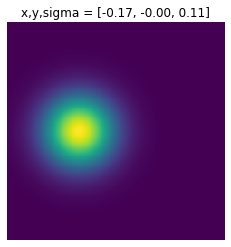

In [64]:
which_prf_grid=5

_, models = initialize_fitting.get_prf_models(aperture_rf_range=1.1, which_grid=which_prf_grid)

# mm=200
mm = 600

x,y,sigma = models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)

plt.figure();
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

In [65]:
subject=1
st_features_file = os.path.join(default_paths.sketch_token_feat_path, \
                                'S%d_features_each_prf_grid%d.h5py'%(subject, which_prf_grid))
print('loading from %s'%st_features_file)
t = time.time()
with h5py.File(st_features_file, 'r') as data_set:
    values = np.copy(data_set['/features'][:,:,mm])
    data_set.close() 
elapsed = time.time() - t
print('Took %.5f seconds to load file'%elapsed)
print(values.shape)

loading from /user_data/mmhender/features/sketch_tokens/S1_features_each_prf_grid5.h5py
Took 31.04441 seconds to load file
(10000, 151)


In [66]:
image_data = nsd_utils.get_image_data(subject)
image_data = nsd_utils.image_uncolorize_fn(image_data)


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


Text(0.5, 0.98, 'feature 20, curv=0.0025, orient=59')

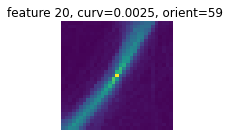

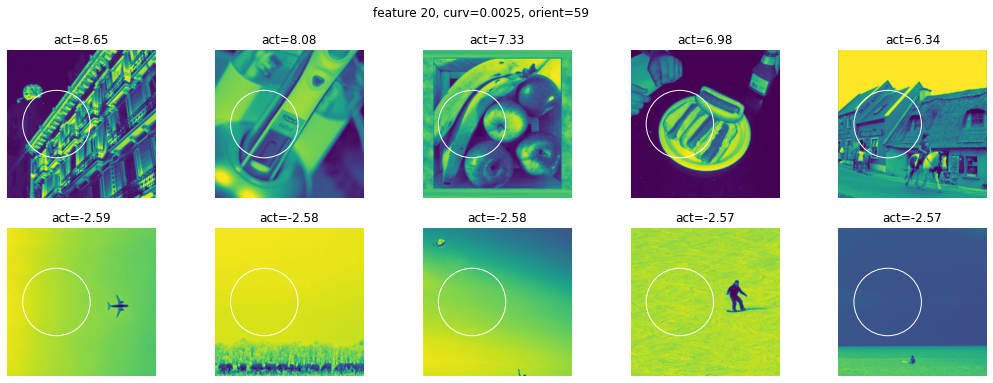

In [67]:
ff = 20
zvals = scipy.stats.zscore(values[:,ff])

plt.figure(figsize=(2,2));
plt.pcolormesh(feature_ims[:,:,ff].T)
plt.gca().invert_yaxis()
plt.axis('off')
# plt.axis('square')
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

top_n = 5
top_images = np.flip(np.argsort(zvals))[0:top_n]
bottom_images = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_images]
bottom_resp = zvals[bottom_images]
top_images = image_data[top_images,0,:,:]
bottom_images = image_data[bottom_images,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%top_resp[ii])
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%bottom_resp[ii])
    
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

Text(0.5, 0.98, 'feature 0, curv=0.0000, orient=95')

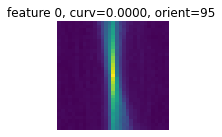

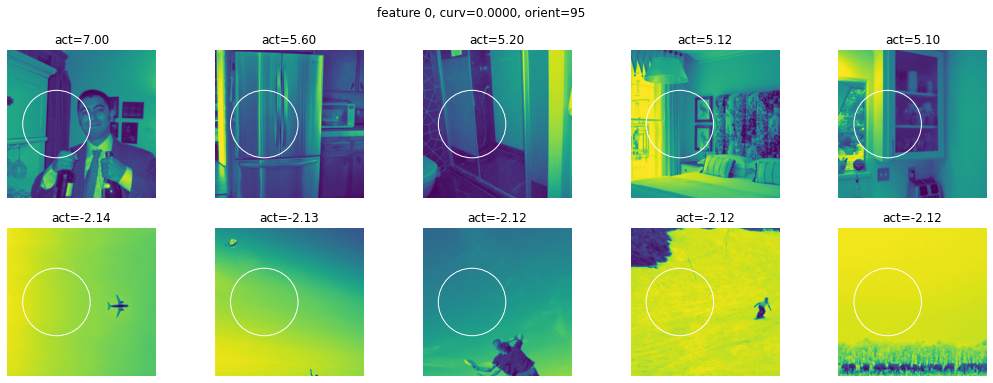

In [68]:
ff = 0
zvals = scipy.stats.zscore(values[:,ff])

plt.figure(figsize=(2,2));
plt.pcolormesh(feature_ims[:,:,ff].T)
plt.gca().invert_yaxis()
plt.axis('off')
# plt.axis('square')
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

top_n = 5
top_images = np.flip(np.argsort(zvals))[0:top_n]
bottom_images = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_images]
bottom_resp = zvals[bottom_images]
top_images = image_data[top_images,0,:,:]
bottom_images = image_data[bottom_images,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%top_resp[ii])
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%bottom_resp[ii])
    
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

Text(0.5, 0.98, 'feature 49, curv=0.0125, orient=220')

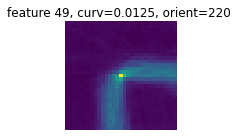

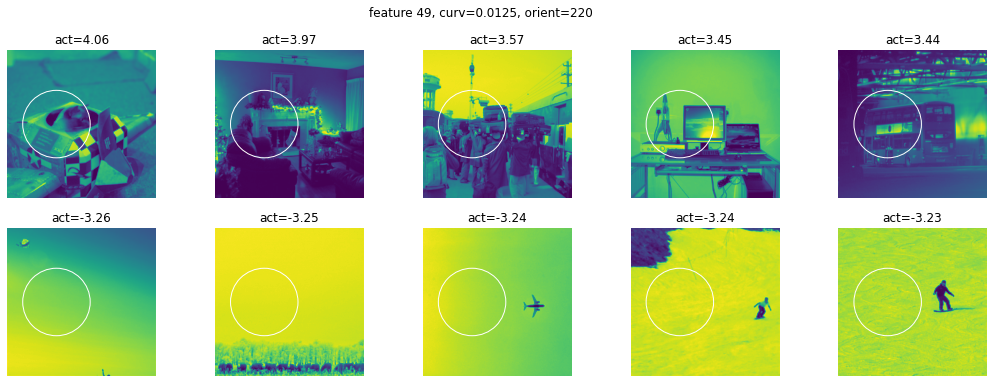

In [72]:
ff = 49
zvals = scipy.stats.zscore(values[:,ff])

plt.figure(figsize=(2,2));
plt.pcolormesh(feature_ims[:,:,ff].T)
plt.gca().invert_yaxis()
plt.axis('off')
# plt.axis('square')
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

top_n = 5
top_images = np.flip(np.argsort(zvals))[0:top_n]
bottom_images = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_images]
bottom_resp = zvals[bottom_images]
top_images = image_data[top_images,0,:,:]
bottom_images = image_data[bottom_images,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%top_resp[ii])
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%bottom_resp[ii])
    
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

Text(0.5, 0.98, 'feature 107, curv=0.0563, orient=25')

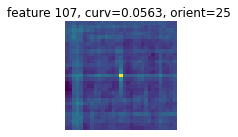

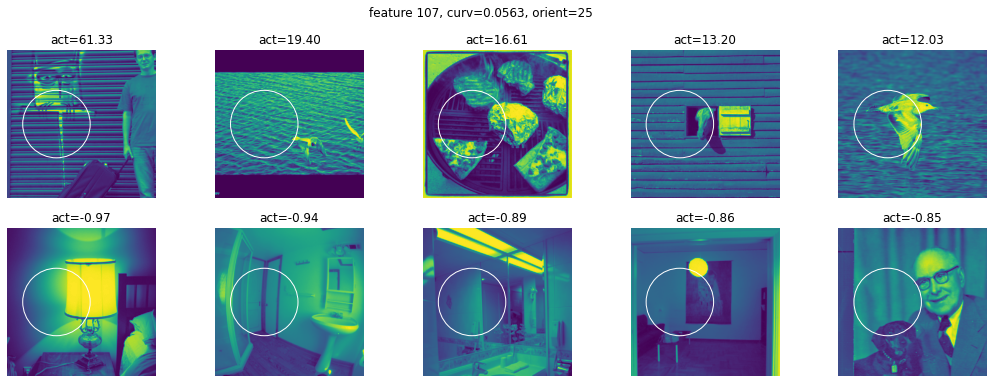

In [70]:
ff = 107
zvals = scipy.stats.zscore(values[:,ff])

plt.figure(figsize=(2,2));
plt.pcolormesh(feature_ims[:,:,ff].T)
plt.gca().invert_yaxis()
plt.axis('off')
# plt.axis('square')
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

top_n = 5
top_images = np.flip(np.argsort(zvals))[0:top_n]
bottom_images = np.argsort(zvals)[0:top_n]
top_resp = zvals[top_images]
bottom_resp = zvals[bottom_images]
top_images = image_data[top_images,0,:,:]
bottom_images = image_data[bottom_images,0,:,:]

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%top_resp[ii])
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('act=%.2f'%bottom_resp[ii])
    
plt.suptitle('feature %d, curv=%.4f, orient=%d'%(ff, curv_values[ff], orient_values[ff]))

In [75]:
# Find an ordering for the sketch tokens features that captures bend/orient info
bend_each_feature = np.array(df['best_bend'])
orient_each_feature = np.array(df['best_orient']*180/np.pi)
bend_values = np.array([0, 0.02,0.07,0.10,0.18,0.45])/8
orients_rad = np.linspace(0,2*np.pi,73)[0:72]
orients_deg = orients_rad*180/np.pi
n_ori = len(np.unique(orients_deg))
n_bend = len(np.unique(bend_values))

sorder = np.argsort(bend_each_feature)
bends_sorted = bend_each_feature[sorder]
orients_sorted = orient_each_feature[sorder]

for bb in range(n_bend):
    inds = np.where(bends_sorted==bend_values[bb])[0]
    orients_to_sort = orients_sorted[inds]
    sorder_to_sort = sorder[inds]
    
    orient_sorder = np.argsort(orients_to_sort)
    orients_sorted[inds] = orients_to_sort[orient_sorder]
    sorder[inds] = sorder_to_sort[orient_sorder]
    
bends_sorted = bend_each_feature[sorder]
orients_sorted = orient_each_feature[sorder]

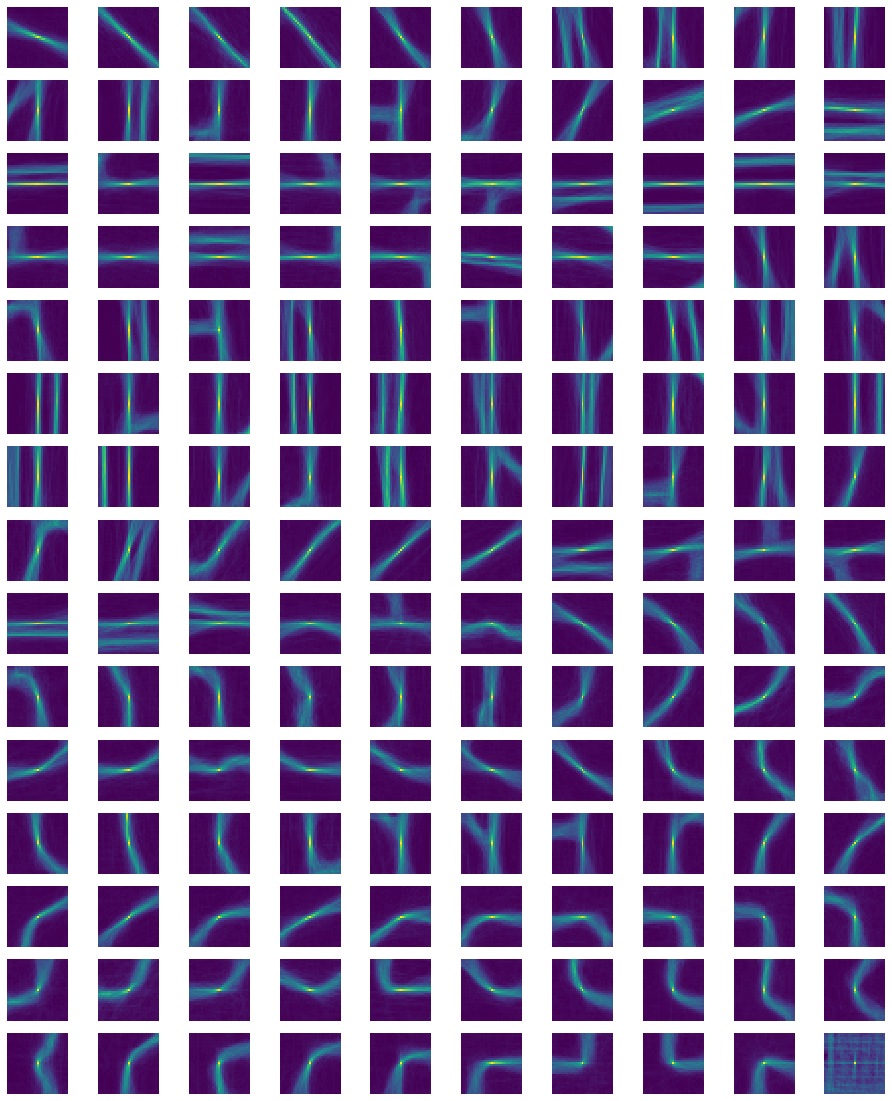

In [82]:
# plot the features in sorted order

plt.figure(figsize=(16,20));
for ii, ff in enumerate(sorder):
    plt.subplot(15,10, ii+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.axis('off')
    plt.axis('square')
#     plt.title('bend=%.4f, ori=%d'%(bend_each_feature[ff], orient_each_feature[ff]))
    